In [22]:
# testing notebook
# test for query processing time
# test for different results when different methods are used.

import sys
import os
import pickle
# use abs path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# "C:\Users\annie\Downloads\data"
sys.path.append(parent_dir)

from retrieval_models.data_loaders import Index
from retrieval_models.retrieval_functions import *
from retrieval_models.reranking import Reranker
from retrieval_models.evaluation_metrics import *
#from preprocessing.tokenizer import Tokenizer
#from preprocessing import NormalTextBlock, LinkBlock, CodeBlock, Block
import tqdm 
import os
import time
from scipy.stats import kendalltau, spearmanr


In [23]:
#import all the examples for ranked retrieval
queries_examples = []
BASE_DIR = os.getcwd()
index_path = os.path.join(BASE_DIR, "data", "queries_examples.txt")
with open(index_path, 'r', encoding='utf-8', errors='replace') as file:
    queries_examples = [line.strip() for line in file if line.strip()]  # Remove empty lines

print(queries_examples[0]) #print the first one for example
print(len(queries_examples)) #print the number of queries


TypeError: 'NoneType' object is not subscriptable in Python
24


In [24]:
#import all boolean examples
queries_examples_boolean = []
BASE_DIR = os.getcwd()
index_path = os.path.join(BASE_DIR, "data", "boolean_queries_examples.txt")
with open(index_path, 'r', encoding='utf-8', errors='replace') as file:
    queries_examples_boolean = [line.strip() for line in file if line.strip()]  # Remove empty lines

print(queries_examples_boolean[0]) #print the first one for example
print(len(queries_examples_boolean)) #print the number of boolean queries

data AND science
7


In [8]:
#initialize the object index 
# ignore the errors is because of the preprocessing done at this stage and it ignores some terms
index = Index()

Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	820167:
done loading index positions
done finding vocab
c:\Users\annie\ttds_assignment\retrieval_models\data\doc_metadata.txt
done loading doc lengths


In [ ]:
# precompute the embeddings -> no need to run this again 
#print(index.vocab[1:10])
#embeddingmodel = EmbeddingModel(vocab = index.vocab)

['httpservletrequestwrapper', 'httpservletrequestwrapp', "httpservletrequest'", 'httpservletrequest', 'httpservletrequ', 'httpservletreqest', 'httpservletresponsewrapper', 'httpservletresponsewrapp', "httpservletresponse'"]


c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

Precomputing embeddings...


Processing batches: 100%|██████████| 9995/9995 [5:05:03<00:00,  1.83s/it]   


✅ Embeddings successfully saved to retrieval_models/data/vocab_embeddings.pkl
🔍 File confirmed at retrieval_models/data/vocab_embeddings.pkl


In [25]:
#after precomputing the embeddings load them in
def load_and_get_embedding(word, save_path="data/embeddings.pkl"):
    "function that loads the embeddings and returns the embedding of the word"
    with open(save_path, "rb") as f:
        embeddings, word_to_index = pickle.load(f)
    
    return embeddings[word_to_index[word]] if word in word_to_index else None

# Example usage
embedding_vector = load_and_get_embedding("java")
if embedding_vector is not None:
    print(f"Embedding: {embedding_vector[:5]} of size {len(embedding_vector)}...")  # Print first 5 values for readability

Embedding: [-0.18265761  0.33220416  0.08295575 -0.00454214  0.13252828] of size 768...


In [26]:
# Iterate over queries and print results
def run_queries(queries_examples, index, embedding_model=None, expansion=False, k=10):
    """
    Runs retrieval for a list of queries and prints top results.
    Also prints the total execution time.
    """
    start_time = time.time()  # Start timer

    retrieved_docs = {}
    
    for query in tqdm.tqdm(queries_examples):
        #print("Query:", query)
        top_results = retrieval_function(query, index,embedding_model, expansion, k)
        #print("Top results:", top_results)
        #print("\n")
        retrieved_docs[query]=top_results

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    print(f"Total Execution Time: {total_time:.4f} seconds")
    print(f"Average Time per Query: {total_time / len(queries_examples):.4f} seconds")

    return total_time, retrieved_docs


In [43]:
#the basic top k results for each query
_,retrieved_docs = run_queries(queries_examples, index, k=10)

  0%|          | 0/24 [00:00<?, ?it/s]

Starting ranked search


  4%|▍         | 1/24 [00:01<00:29,  1.29s/it]

Starting ranked search


  8%|▊         | 2/24 [00:02<00:33,  1.52s/it]

Starting ranked search


 12%|█▎        | 3/24 [00:04<00:30,  1.43s/it]

Starting ranked search


 17%|█▋        | 4/24 [00:04<00:21,  1.10s/it]

Starting ranked search


 21%|██        | 5/24 [00:05<00:17,  1.08it/s]

Starting ranked search


 29%|██▉       | 7/24 [00:06<00:09,  1.78it/s]

Starting ranked search
Starting ranked search


 38%|███▊      | 9/24 [00:07<00:07,  1.93it/s]

Starting ranked search
Starting ranked search
Starting ranked search


 46%|████▌     | 11/24 [00:07<00:05,  2.35it/s]

Starting ranked search


 54%|█████▍    | 13/24 [00:08<00:04,  2.40it/s]

Starting ranked search
Starting ranked search


 62%|██████▎   | 15/24 [00:08<00:02,  3.77it/s]

Starting ranked search
Starting ranked search


 71%|███████   | 17/24 [00:09<00:02,  3.46it/s]

Starting ranked search
Starting ranked search


 75%|███████▌  | 18/24 [00:09<00:01,  3.88it/s]

Starting ranked search


 79%|███████▉  | 19/24 [00:09<00:01,  3.90it/s]

Starting ranked search


 83%|████████▎ | 20/24 [00:10<00:01,  2.90it/s]

Starting ranked search


 88%|████████▊ | 21/24 [00:10<00:01,  2.91it/s]

Starting ranked search
Starting ranked search


 96%|█████████▌| 23/24 [00:11<00:00,  4.07it/s]

Starting ranked search


100%|██████████| 24/24 [00:11<00:00,  2.07it/s]

Total Execution Time: 11.5921 seconds
Average Time per Query: 0.4830 seconds


In [39]:
#k_vals = [10,20,30,40] 
#exec_times = []
#retrieved_docs = {}
#run the queries for different k values
#for k in k_vals:
 #   print(f"Results for k={k}")
 #   exec_time, retrieved_docs = run_queries(queries_examples, index, k=k)
 #   exec_times.append(exec_time)

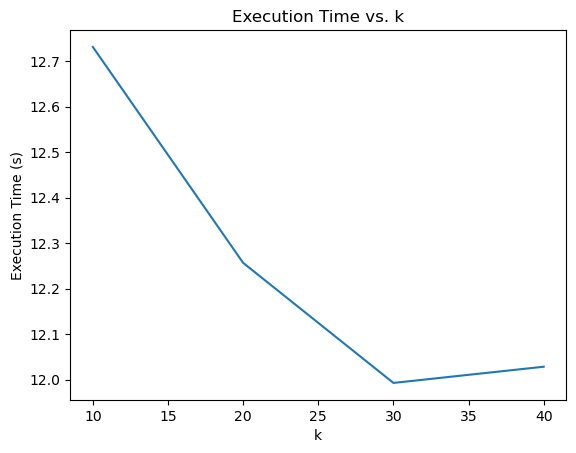

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_vals, exec_times)
plt.xlabel("k")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. k")
plt.show()

## Using Query Expansion : still to do and experiment

In [38]:
embeddingmodel = EmbeddingModel(vocab = index.vocab, save_path="data/embeddings.pkl")
#need to compute embeddings again! before running this
#retrieved_docs_expansion = run_queries(queries_examples, index, embeddingmodel, expansion=True)

c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

Loading embeddings from data/embeddings.pkl...


In [42]:
_,retrieved_docs_emb = run_queries(queries_examples, index, embeddingmodel, expansion=True, k=10)

  0%|          | 0/24 [00:00<?, ?it/s]

Starting ranked search


  4%|▍         | 1/24 [00:01<00:30,  1.35s/it]

Starting ranked search
Word 'nullpointerexception' not found in precomputed embeddings
❌ Word 'nullpointerexception' not found in vocabulary. Cannot find similar words.
Word 'handling' not found in precomputed embeddings
❌ Word 'handling' not found in vocabulary. Cannot find similar words.
[116217]
[134191]


  8%|▊         | 2/24 [00:04<00:53,  2.44s/it]

Starting ranked search
Word 'modulenotfounderror:' not found in precomputed embeddings
❌ Word 'modulenotfounderror:' not found in vocabulary. Cannot find similar words.
Word 'no' not found in precomputed embeddings
❌ Word 'no' not found in vocabulary. Cannot find similar words.
Word 'module' not found in precomputed embeddings
❌ Word 'module' not found in vocabulary. Cannot find similar words.
Word 'named' not found in precomputed embeddings
❌ Word 'named' not found in vocabulary. Cannot find similar words.
Word ''requests'' not found in precomputed embeddings
❌ Word ''requests'' not found in vocabulary. Cannot find similar words.


 12%|█▎        | 3/24 [00:05<00:41,  1.98s/it]

Starting ranked search
Word 'segmentation' not found in precomputed embeddings
❌ Word 'segmentation' not found in vocabulary. Cannot find similar words.
[63562]
[116217]
Word 'c++' not found in precomputed embeddings
❌ Word 'c++' not found in vocabulary. Cannot find similar words.


 17%|█▋        | 4/24 [00:08<00:40,  2.03s/it]

Starting ranked search
Word 'syntaxerror:' not found in precomputed embeddings
❌ Word 'syntaxerror:' not found in vocabulary. Cannot find similar words.
[128994]
[15769]
[44624]
Word ''elif'' not found in precomputed embeddings
❌ Word ''elif'' not found in vocabulary. Cannot find similar words.


 21%|██        | 5/24 [00:10<00:43,  2.31s/it]

Starting ranked search
Word 'difference' not found in precomputed embeddings
❌ Word 'difference' not found in vocabulary. Cannot find similar words.
[135717]
[47515]
[6406]
[28649]
Word 'algorithms' not found in precomputed embeddings
❌ Word 'algorithms' not found in vocabulary. Cannot find similar words.


 29%|██▉       | 7/24 [00:14<00:31,  1.85s/it]

Starting ranked search
Starting ranked search


 33%|███▎      | 8/24 [00:15<00:24,  1.53s/it]

Starting ranked search


 38%|███▊      | 9/24 [00:15<00:16,  1.13s/it]

Starting ranked search
[45782]
[194857]
Word 'programming' not found in precomputed embeddings
❌ Word 'programming' not found in vocabulary. Cannot find similar words.
[179648]


 42%|████▏     | 10/24 [00:18<00:23,  1.69s/it]

[97084]
Word 'example' not found in precomputed embeddings
❌ Word 'example' not found in vocabulary. Cannot find similar words.
Starting ranked search


 46%|████▌     | 11/24 [00:19<00:17,  1.36s/it]

Starting ranked search


 50%|█████     | 12/24 [00:19<00:14,  1.18s/it]

Starting ranked search
[209811]
[2]
[202713]
Word 'pointers' not found in precomputed embeddings
❌ Word 'pointers' not found in vocabulary. Cannot find similar words.
[116217]
Word 'c++?' not found in precomputed embeddings
❌ Word 'c++?' not found in vocabulary. Cannot find similar words.


 58%|█████▊    | 14/24 [00:23<00:12,  1.26s/it]

Starting ranked search
Starting ranked search
Starting ranked search


 67%|██████▋   | 16/24 [00:23<00:06,  1.21it/s]

Starting ranked search
[190758]
Word 'does' not found in precomputed embeddings
❌ Word 'does' not found in vocabulary. Cannot find similar words.
Word 'std::move' not found in precomputed embeddings
❌ Word 'std::move' not found in vocabulary. Cannot find similar words.
[110950]
[116217]
Word 'c++?' not found in precomputed embeddings
❌ Word 'c++?' not found in vocabulary. Cannot find similar words.


 75%|███████▌  | 18/24 [00:26<00:05,  1.01it/s]

Starting ranked search
Starting ranked search


 79%|███████▉  | 19/24 [00:26<00:03,  1.27it/s]

Starting ranked search


 83%|████████▎ | 20/24 [00:27<00:02,  1.34it/s]

Starting ranked search
[22003]
[100147]
[4436]
[220722]
[53951]


 88%|████████▊ | 21/24 [00:31<00:05,  1.67s/it]

Starting ranked search
Word 'coding' not found in precomputed embeddings
❌ Word 'coding' not found in vocabulary. Cannot find similar words.
Word 'is' not found in precomputed embeddings
❌ Word 'is' not found in vocabulary. Cannot find similar words.
Word 'very' not found in precomputed embeddings
❌ Word 'very' not found in vocabulary. Cannot find similar words.


 92%|█████████▏| 22/24 [00:32<00:02,  1.39s/it]

[31966]
Starting ranked search
Word 'ajdejfn' not found in precomputed embeddings
❌ Word 'ajdejfn' not found in vocabulary. Cannot find similar words.
[33112]


 96%|█████████▌| 23/24 [00:33<00:01,  1.27s/it]

Starting ranked search
[59294]
[2]
[38603]
[121157]
Word 'website' not found in precomputed embeddings
❌ Word 'website' not found in vocabulary. Cannot find similar words.


100%|██████████| 24/24 [00:36<00:00,  1.51s/it]

Total Execution Time: 36.2782 seconds
Average Time per Query: 1.5116 seconds


In [53]:
# analyze if the results are different
# Compare the results of the two methods

def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

for query in queries_examples:
    print(f"Query: {query}", jaccard_similarity(retrieved_docs[query], retrieved_docs_emb[query]))
    #compute jaccard similarity
    #print("Results without expansion:", retrieved_docs[query])
    #print("Results with expansion:", retrieved_docs_emb[query])



Query: TypeError: 'NoneType' object is not subscriptable in Python 1.0
Query: NullPointerException handling in Java 0.8181818181818182
Query: ModuleNotFoundError: No module named 'requests' 1.0
Query: Segmentation fault in C++ 0.0
Query: SyntaxError: invalid syntax near 'elif' 0.6666666666666666
Query: Difference between DFS and BFS algorithms 1.0
Query: How does garbage collection work in Java? 1.0
Query: What is tail recursion, and how does it optimize memory 1.0
Query: What are strong and weak references in Python? 1.0
Query: Explain dynamic programming with an example 0.42857142857142855
Query: Best way to concatenate strings in Python 1.0
Query: How to optimize SQL queries for large datasets? 1.0
Query: When to use pointers in C++? 0.0
Query: Why is binary search faster than linear search? 1.0
Query: How to improve performance of nested loops in Java? 1.0
Query: How to use Pandas groupby with multiple columns? 1.0
Query: What does std::move do in C++? 0.17647058823529413
Query: Di

## Other searches

In [72]:
def handle_query(query: str, index):
    """
    Handles a search query using Boolean operators AND, OR, and NOT.
    """

    def search(index, term):
        """Searches for a term in the index and returns document IDs as a set."""
        term = term.strip()
        term_data = index.get(term, {})

        # Ensure doc_info exists and is a list of tuples
        doc_info = term_data.get("doc_info", [])

        if isinstance(doc_info, list):
            return set(str(doc_id) for doc_id, _ in doc_info)  # Extract document IDs as strings

        return set()

    def apply_operator(op, left, right=None):
        """Applies Boolean operators using set operations."""
        if op == "AND":
            return left & right  # Intersection
        elif op == "OR":
            return left | right  # Union
        elif op == "NOT":
            #this can be precomputed - very slow
            all_docs = set(doc_id for term_data in index.values() for doc_id in term_data["doc_info"].keys())

            return all_docs - right if left is None else left - right  # Complement
        return set()

    
    # Define operator precedence
    precedence = {"NOT": 3, "AND": 2, "OR": 1}
    operators = []
    operands = []
    
    # Tokenize query (keep case sensitivity)
    tokens = query.split()
    
    for token in tokens:
        if token in precedence:
            # Apply operators with higher precedence before pushing new ones
            while operators and precedence[operators[-1]] >= precedence[token]:
                op = operators.pop()
                right = operands.pop()
                left = operands.pop() if operands else None
                operands.append(apply_operator(op, left, right))
            operators.append(token)
        else:
            # Process search terms, ensuring a valid set is stored in operands
            operands.append(search(index, token))

    # Apply remaining operators
    while operators:
        op = operators.pop()
        right = operands.pop()
        left = operands.pop() if operands else None
        operands.append(apply_operator(op, left, right))

    return sorted(operands.pop()) if operands else "No matches found"

In [101]:
def handle_query(query: str, index):
    """
    Handles a search query using Boolean operators AND, OR, and NOT.
    """

    def search(index, term):
        """Searches for a term in the index and returns document IDs as a set."""
        term = term.strip()
        term_data = index.get(term, {})

        # Ensure doc_info exists and is a list of tuples
        doc_info = term_data.get("doc_info", [])

        if isinstance(doc_info, list):
            return set(str(doc_id) for doc_id, _ in doc_info)  # Extract document IDs as strings

        return set()

    def apply_operator(op, left, right=None):
        """Applies Boolean operators using set operations."""
        if op == "AND":
            return left & right  # Intersection
        elif op == "OR":
            return left | right  # Union
        elif op == "NOT":
            # can be precomputed
            all_docs = set(str(doc_id) for term_data in index.values() for doc_id, _ in term_data.get("doc_info", []))
            return all_docs - set(right) if not left else set(left) - set(right)
        else:
            print("No matches found")
            return set()


    # Define operator precedence
    precedence = {"NOT": 3, "AND": 2, "OR": 1}
    operators = []
    operands = []
    
    # Tokenize query (keep case sensitivity)
    tokens = query.split()
    
    for token in tokens:
        if token in precedence:
            # Apply operators with higher precedence before pushing new ones
            while operators and precedence[operators[-1]] >= precedence[token]:
                op = operators.pop()
                right = operands.pop()
                left = operands.pop() if operands else None
                operands.append(apply_operator(op, left, right))
            operators.append(token)
        else:
            # Process search terms, ensuring a valid set is stored in operands
            operands.append(search(index, token))

    # Apply remaining operators
    while operators:
        op = operators.pop()
        right = operands.pop()
        left = operands.pop() if operands else None
        operands.append(apply_operator(op, left, right))

    return sorted(operands.pop()) if operands else "No matches found"


In [ ]:
index_example = {
    "java": {
        "df": 55962,
        "doc_info": [
            ("419043", [6]), 
            ("419070", [11, 13]), 
            ("419139", [110, 286, 318])
        ]
    },
    "python": {
        "df": 60000,
        "doc_info": [
            ("419043", [5, 9]), 
            ("419070", [15, 22]), 
            ("419200", [30, 42])
        ]
    },
    "c++": {
        "df": 45000,
        "doc_info": [
            ("419043", [2, 10, 25]), 
            ("419139", [17, 48, 90]), 
            ("419210", [5, 12, 50])
        ]
    },
    "machine learning": {
        "df": 35000,
        "doc_info": [
            ("419070", [3, 14, 50]), 
            ("419139", [9, 27, 100]), 
            ("419250", [1, 5, 10])
        ]
    }
}

print(handle_query("java AND python", index_example))
print(handle_query("java OR c++", index_example))
print(handle_query("NOT java", index_example))
print(handle_query("python AND c++ AND java", index_example))


['419043', '419070']
['419043', '419070', '419139', '419210']
['419200', '419210', '419250']
['419043']


In [75]:
for query in queries_examples_boolean:
    print("Query:", query)
    print("Results:", handle_query(query, index.get_index()))
    print("\n")

Query: data AND science
Results: []


Query: machine AND learning OR programming


KeyboardInterrupt: 

## Evaluation
First using the clarity score and then with Jaccobian/cosine similarity of the documents <br>
**Clarity scores are all positive** :  A higher Clarity Score means the query retrieves more distinct and focused documents, while a lower score suggests the retrieved documents are more generic or similar to the background corpus <br>
**Jaccobian/cosine similarity** : Measures the similarity between the retrieved documents

In [ ]:
import math
from collections import Counter

def load_document_terms(file_path, retrieved_docs):
    """
    Reads document terms from `document_terms.txt` and extracts terms for retrieved documents.
    Returns : Counter: A term frequency counter for retrieved documents.
    """
    retrieved_vocab = Counter()

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split(":")
            if len(parts) < 2:
                continue  # Skip malformed lines
            
            doc_id = parts[0].strip()
            if doc_id in retrieved_docs:  # Process only retrieved documents
                terms = parts[1].split()
                retrieved_vocab.update(terms)  # Count term frequencies

    return retrieved_vocab


def compute_clarity_score(document_terms_file, retrieved_docs, index):
    """
    Computes the Clarity Score using KL divergence efficiently with `document_terms.txt`.

    Args:
        document_terms_file (str): Path to the `document_terms.txt` file.
        retrieved_docs (list): List of retrieved document IDs.
        index (dict): The inverted index with term document frequency (df).

    Returns:
        float: Clarity Score (higher means query is more specific).
    """

    # extract terms for retrieved documents -> this is way more efficient that going through index file
    retrieved_vocab = load_document_terms(document_terms_file, set(retrieved_docs))

    # compute probability distribution for retrieved terms
    total_retrieved_terms = sum(retrieved_vocab.values())
    if total_retrieved_terms == 0:
        return 0  

    retrieved_probs = {term: count / total_retrieved_terms for term, count in retrieved_vocab.items()}

    # Compute Clarity Score using document frequency (df) from index
    total_docs = sum(term_data["df"] for term_data in index.values())  # Total number of docs in index
    clarity_score = 0.0

    for term, p_retrieved in retrieved_probs.items():
        p_corpus = index.get(term, {}).get("df", 1e-12) / total_docs  # Use DF as corpus probability
        clarity_score += p_retrieved * math.log(p_retrieved / p_corpus)

    return clarity_score

# Compute Clarity Scores : they all seem positive and good 

documents_list = retrieved_docs

for query in queries_examples:
    clarity_score = compute_clarity_score("data/document_terms.txt", documents_list[query], index.get_index())
    print(f"Clarity Score for '{query}': {clarity_score:.4f}")


#higher clarity scores - makes sense as the expansion should make the query more specific

#need to visualize the tradeoff with the number of added words!
documents_list = retrieved_docs_emb

print("Results with expansion:")
for query in queries_examples:
    clarity_score = compute_clarity_score("data/document_terms.txt", documents_list[query], index.get_index())
    print(f"Clarity Score for '{query}': {clarity_score:.4f}")


Clarity Score for 'TypeError: 'NoneType' object is not subscriptable in Python': 2.2356
Clarity Score for 'NullPointerException handling in Java': 2.5564
Clarity Score for 'ModuleNotFoundError: No module named 'requests'': 2.6116
Clarity Score for 'Segmentation fault in C++': 2.4958
Clarity Score for 'SyntaxError: invalid syntax near 'elif'': 2.5540
Clarity Score for 'Difference between DFS and BFS algorithms': 3.0122
Clarity Score for 'How does garbage collection work in Java?': 2.6428
Clarity Score for 'What is tail recursion, and how does it optimize memory': 3.0685
Clarity Score for 'What are strong and weak references in Python?': 2.3415
Clarity Score for 'Explain dynamic programming with an example': 2.8331
Clarity Score for 'Best way to concatenate strings in Python': 2.5238
Clarity Score for 'How to optimize SQL queries for large datasets?': 2.6725
Clarity Score for 'When to use pointers in C++?': 2.4395
Clarity Score for 'Why is binary search faster than linear search?': 2.819

In [ ]:
import itertools
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

def load_document_terms(file_path, retrieved_docs):
    """
    Reads `document_terms.txt` and extracts terms for retrieved documents.

    Args:
        file_path (str): Path to the document terms file.
        retrieved_docs (set): A set of retrieved document IDs.

    Returns:
        dict: A dictionary where keys are doc IDs and values are term lists.
    """
    doc_terms = {}
    doc_lengths = {}  # Store document lengths for normalization

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split(":")
            if len(parts) < 2:
                continue  # Skip malformed lines
            
            doc_id = parts[0].strip()
            if doc_id in retrieved_docs:  # Process only retrieved documents
                terms = parts[1].split()
                doc_terms[doc_id] = terms
                doc_lengths[doc_id] = len(terms)  # Store document length

    return doc_terms, doc_lengths


def jaccard_similarity(doc1_terms, doc2_terms):
    """
    Computes Jaccard Similarity with length normalization.
    J(A, B) = |A ∩ B| / |A ∪ B|
    """
    intersection = len(set(doc1_terms) & set(doc2_terms))
    union = len(set(doc1_terms) | set(doc2_terms))
    return intersection / union if union != 0 else 0.0


def compute_document_similarities(document_terms_file, retrieved_docs):
    """
    Computes pairwise Jaccard & Cosine Similarity between retrieved documents with length normalization.

    Args:
        document_terms_file (str): Path to `document_terms.txt`.
        retrieved_docs (list): List of retrieved document IDs.

    Returns:
        dict: Average Jaccard & Cosine similarity.
    """

    # load documents and lengths -> we want to normalize!
    doc_terms, doc_lengths = load_document_terms(document_terms_file, set(retrieved_docs))
    doc_ids = list(doc_terms.keys())

    # compute Jaccard Similarity and take the mean
    jaccard_scores = []
    for doc1, doc2 in itertools.combinations(doc_ids, 2):
        jaccard_scores.append(jaccard_similarity(doc_terms[doc1], doc_terms[doc2]))

    avg_jaccard = np.mean(jaccard_scores) if jaccard_scores else 0.0

    #  compute Cosine Similarity 
    all_terms = sorted(set(term for terms in doc_terms.values() for term in terms))  # Unique terms
    term_index = {term: i for i, term in enumerate(all_terms)}

    doc_vectors = []
    avg_doc_length = np.mean(list(doc_lengths.values())) if doc_lengths else 1

    for doc_id in doc_ids:
        term_freq = Counter(doc_terms[doc_id])  # Count term occurrences
        vector = np.zeros(len(all_terms))
        for term, freq in term_freq.items():
            # Apply BM25-style document length normalization
            normalized_tf = freq / (freq + 1.5 * (1 - 0.75 + 0.75 * (doc_lengths[doc_id] / avg_doc_length)))
            vector[term_index[term]] = normalized_tf
        doc_vectors.append(vector)

    doc_vectors = np.array(doc_vectors)
    cosine_sim_matrix = cosine_similarity(doc_vectors)

    # Compute average pairwise cosine similarity
    cosine_scores = []
    for i in range(len(doc_ids)):
        for j in range(i + 1, len(doc_ids)):
            cosine_scores.append(cosine_sim_matrix[i, j])

    avg_cosine = np.mean(cosine_scores) if cosine_scores else 0.0

    return {
        "Average Jaccard Similarity": avg_jaccard,
        "Average Cosine Similarity": avg_cosine
    }

for query in queries_examples:
    if retrieved_docs[query]:
        similarities = compute_document_similarities("data/document_terms.txt", retrieved_docs[query])
        print(f"Similarities for '{query}': {similarities}")
    else:
        print(f"No retrieved documents for '{query}'")

Similarities for 'TypeError: 'NoneType' object is not subscriptable in Python': {'Average Jaccard Similarity': 0.05632541946569733, 'Average Cosine Similarity': 0.11966260768140392}
Similarities for 'NullPointerException handling in Java': {'Average Jaccard Similarity': 0.09270600714378863, 'Average Cosine Similarity': 0.18105303962727817}
No retrieved documents for 'ModuleNotFoundError: No module named 'requests''
Similarities for 'Segmentation fault in C++': {'Average Jaccard Similarity': 0.03873586873869889, 'Average Cosine Similarity': 0.08172648816543192}
Similarities for 'SyntaxError: invalid syntax near 'elif'': {'Average Jaccard Similarity': 0.07332165149680576, 'Average Cosine Similarity': 0.1482536039022934}
Similarities for 'Difference between DFS and BFS algorithms': {'Average Jaccard Similarity': 0.0907343787417974, 'Average Cosine Similarity': 0.1708309952282187}
Similarities for 'How does garbage collection work in Java?': {'Average Jaccard Similarity': 0.036173275299940

## Reranked based on metadata

In [ ]:
#the reranker ranks mostly every time differently than the initial retrieval

reranked = Reranker()
#print(reranked.metadata)
reranked.metadata["id"] = reranked.metadata["id"].astype(str).str.strip()
reranked.metadata.fillna(0,inplace=True)
reranked_doc_list={}
for key,retrieved_docs_list in retrieved_docs.items():
    print("initial list")
    print(retrieved_docs_list)
    if retrieved_docs_list!="No relevant documents found for this query.":
        print("after reranking")
        reranked_doc_list[key]=reranked.rerank(retrieved_docs_list)
        print(reranked_doc_list[key])
    else:
        print("no reranking")


initial list
['1490039', '1308079', '631788', '1689012', '1449620', '1689145', '768941', '1115313', '1772491', '550585', '550915', '768956', '1529527', '1689139', '999182', '1728697', '550868', '1223197', '1601656', '506956']
after reranking
['1115313', '631788', '506956', '768956', '1490039', '550915', '999182', '550868', '550585', '768941', '1223197', '1689145', '1308079', '1601656', '1449620', '1529527', '1689012', '1689139', '1772491', '1728697']
initial list
['1345786', '1264818', '1733292', '1184789', '1366832', '767009', '1028892', '1607800', '1697522', '961538', '1125604', '1580091', '1593100', '609329', '1259460', '580511', '1514112', '1533812', '841292', '1711103']
after reranking
['1580091', '580511', '609329', '1533812', '767009', '841292', '1125604', '961538', '1028892', '1264818', '1184789', '1345786', '1259460', '1366832', '1593100', '1514112', '1607800', '1697522', '1733292', '1711103']
initial list
[]
after reranking
⚠ Warning: No retrieved documents found in metadata.

In [ ]:
from scipy.stats import kendalltau, spearmanr

def calculate_rank_correlation(retrieved_docs, reranked_doc_list):
    """
    Calculates Kendall's Tau and Spearman's Rank Correlation
    between the retrieved and re-ranked document lists.
    """
    correlation_results = {}

    for query in reranked_doc_list:
        retrieved_list = retrieved_docs[query]
        reranked_list = reranked_doc_list[query]

        # ensure for empty
        if not retrieved_list or not reranked_list:
            print(f"Skipping query '{query}': One of the lists is empty")
            continue

        # Compute Kendall's Tau and Spearman's Rank Correlation
        kendall_tau_ = kendalltau(retrieved_list, reranked_list).correlation
        spearman_corr_ = spearmanr(retrieved_list, reranked_list).correlation

        correlation_results[query] = {
            "Kendall's Tau": kendall_tau_,
            "Spearman's Rank Correlation": spearman_corr_
        }

        print(f"Query: {query}")
        print(f"Kendall's Tau: {kendall_tau_}")
        print(f"Spearman’s Rank Correlation: {spearman_corr_}\n")

    return correlation_results

correlation_results = calculate_rank_correlation(retrieved_docs, reranked_doc_list)

#If τ is low but re-ranking makes sense based on metadata/LM, it may be good.
#If τ is high, re-ranking didn’t change much.

#small value for all of them


Query: TypeError: 'NoneType' object is not subscriptable in Python
Kendall's Tau: 0.010526315789473684
Spearman’s Rank Correlation: 0.019548872180451125

Query: NullPointerException handling in Java
Kendall's Tau: 0.15789473684210525
Spearman’s Rank Correlation: 0.20300751879699244

Skipping query 'ModuleNotFoundError: No module named 'requests'': One of the lists is empty
Query: Segmentation fault in C++
Kendall's Tau: 0.031578947368421054
Spearman’s Rank Correlation: 0.009022556390977442

Query: SyntaxError: invalid syntax near 'elif'
Kendall's Tau: 0.021052631578947368
Spearman’s Rank Correlation: 0.12932330827067667

Query: Difference between DFS and BFS algorithms
Kendall's Tau: 0.052631578947368425
Spearman’s Rank Correlation: 0.013533834586466165

Query: How does garbage collection work in Java?
Kendall's Tau: 0.0736842105263158
Spearman’s Rank Correlation: 0.0706766917293233

Query: What is tail recursion, and how does it optimize memory
Kendall's Tau: 0.5052631578947369
Spearm

In [ ]:
def get_docs_for_term(term, doct):
    stemmer_term=stemmer.stem(term.lower())
    return set(doct.get(stemmer_term, [0, {}])[1].keys())

def boolean_and(term1, term2, doct):
    docs1 = get_docs_for_term(term1, doct)
    docs2 = get_docs_for_term(term2, doct)
    return docs1 & docs2

def boolean_or(term1, term2, doct):
    docs1 = get_docs_for_term(term1, doct)
    docs2 = get_docs_for_term(term2, doct)
    ans = docs1 | docs2
    return ans 

def boolean_not(term2, alldocs, doct):
    docs = get_docs_for_term(term2, doct)
    ans= alldocs - docs
    return ans

def boolean_search(query, dict, doc_set):
    words = query.split()

    # Handle simple Boolean expressions with AND/OR
    if len(words) == 3 and not(words[0].startswith('"')):
        term1, operator, term2 = words

        # Handle AND operation
        if operator.lower() == "and":
            ans = boolean_and(term1, term2, dict)
            return ans

        # Handle OR operation
        if operator.lower() == "or":
            ans = boolean_or(term1, term2, dict)
            return ans

    # More complex cases with phrase searches or NOT operators
    else:
        result = set()

        i = 0
        while i < len(words):
            if words[i].lower() == "not":  # Handling 'NOT' logic
                stemmed_word = stemmer.stem(words[i + 1].lower())
                res1 = boolean_not(stemmed_word, doc_set, dict)
                result = result.union(res1)
                i += 2
            elif words[i].strip('"').lower() in ["and", "or"]:  # Handle AND/OR with previous results
                operator = words[i].strip('"').lower()
                next_term = words[i + 1].strip('"').lower()
                stemmed_word = stemmer.stem(next_term.lower())
                if(next_term.lower()!="not"):
                    if(words[i+1].startswith('"')):
                       phrase_term = words[i+1].strip('"')+' '+words[i+2].strip('"')
                       res2 = phrase_search(phrase_term, dict)
                       i+=3
                    else:
                      res2 = get_docs_for_term(stemmed_word, dict)
                      i+=2
                elif(next_term.lower()=="not"):
                    stemmed_word = stemmer.stem(words[i + 2].lower())
                    res2 = boolean_not(stemmed_word, doc_set, dict)
                    i+=3

                if operator == "and":
                    result = result.intersection(res2)
                elif operator == "or":
                    result = result.union(res2)
                #i += 2
            elif words[i].startswith('"') and words[i].strip('"').lower() not in ["and", "or"]:  # Handle phrase search
                
                phrase_term = words[i].strip('"')+' '+words[i+1].strip('"')
                res1 = phrase_search(phrase_term, dict)
                result = result.union(res1)
                i += 2
            else:  # Handle individual terms or proximity searches
                term = words[i]
                stemmed_term = stemmer.stem(term.lower())

                if i < len(words) - 1 and words[i + 1] == "#":  # Proximity search
                    proximity_term = words[i] + words[i + 1]
                    res1 = proximity_search(proximity_term, dict)
                    result = result.union(res1)
                    i += 2
                else:  # Regular term search
                    res1 = get_docs_for_term(stemmed_term, dict)
                    result = result.union(res1)
                    i += 1
            if(i>=len(words)):
               return result

    return {}


def get_docs_and_positions(term,dict):
   stemterm=stemmer.stem(term.lower())
   if(stemterm in dict):
     return dict[stemterm][1]

   return {}

#phrase search
def phrase_search(query, dict):
    words = query.split()
    if stemmer.stem(words[0].lower()) not in dict:
        return [] 
    
    first_term_docs = get_docs_and_positions(words[0].lower(), dict)

    for i in range(1, len(words)):
        next_word = words[i]
        
        if stemmer.stem(next_word.lower()) not in dict:
            return []
        
        next_word_docs = get_docs_and_positions(next_word.lower(), dict)
        
        new_candidate_docs = {}
        
        for doc_id, positions in first_term_docs.items():
            if doc_id in next_word_docs:
                next_word_positions = next_word_docs[doc_id]
                
                for pos in positions:
                    if pos + 1 in next_word_positions:
                        if doc_id not in new_candidate_docs:
                            new_candidate_docs[doc_id] = []
                        new_candidate_docs[doc_id].append(pos + 1)
        
        first_term_docs = new_candidate_docs
    
    return list(first_term_docs.keys())

#proximity search
def proximity_search(query,dict):
   pattern = r"#(\d+)\((\w+),\s*(\w+)\)"
   match = re.match(pattern, query)
   if match:
    number = match.group(1)
    word1 = match.group(2)
    word2 = match.group(3)
   stemterm1=stemmer.stem(word1.lower())
   stemterm2=stemmer.stem(word2.lower())
   docs1=get_docs_for_term(word1,dict)
   docs2=get_docs_for_term(word2,dict)
   docs_both_terms=docs1 & docs2
   ans_doc=[]
   for doc in docs_both_terms:

      positions1=dict[stemterm1][1][doc]
      positions2=dict[stemterm2][1][doc]
      for pos1 in positions1:
         for pos2 in positions2:
            if abs(pos1 - pos2)<int(number):
               ans_doc.append(doc)

   return set(ans_doc)